# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">As respostas devem ser dadas no Moodle, o notebook deve ser usado para executar código para obtenção dos resultados.</span>

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Questão 1)

São exemplos típicos de dados não estruturados sequenciais e espaciais:

(a) sequencial: a coluna idade de uma tabela de uma base de dados relacional, ordenada de forma ascendente; espacial: mapa de calor de temperaturas em uma região <br>
(b) sequencial: valores de umidade relativa do ar obtidos em cidades diferentes de uma determinada região; espacial: os valores de uma tabela de base de dados relacional de compras<br>
(c) sequencial: valores de temperatura obtidos de hora em hora em um determinado dia e cidade; espacial: uma imagem de satélite<br>
(d) sequencial: quantidade de acessos à uma página web coletados a cada minuto; espacial: áudio capturado de uma sala de reuniões<br>

### Questão 2)

Carregue os dados do arquivo `pollution.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 3 colunas (0, 1 e 2) relativas a medição de monóxido de carbono durante 12 horas de dia em localidades de uma cidade, sendo que o primeiro deles (na primeira coluna) foi capturado em um mesmo bairro na periferia da cidade próximo à rodovia. Os outros dois não sabemos onde foram coletados, mas sabemos que um deles teve coleta em uma região central, e o outro também em uma região periférica.

Queremos identificar qual coluna (1 ou 2) mais se assemelha a primeira (0). Para isso, utilize a distância euclidiana e um vetor de características composto de:
* Entropia da energia (com 12 blocos)
* Entropia espectral (com 12 blocos)
* Centróide espectral (considere frequência = 0.2Hz)
* Dispersão espectral (considere frequência = 0.2Hz)

Qual coluna é a mais semelhante, e quando consideramos a comparação da coluna 0 com essa mais semelhante, qual feature (individualmente) apresentou a menor distância Euclidiana?

(a) Coluna 2, Feature Entropia da Energia<br>
(b) Coluna 1, Feature Centróide espectral<br>
(c) Coluna 2, Feature Dispersão espectral<br>
(d) Coluna 1, Feature Entropia espectral<br>

### Questão 3)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. As 100 primeiras imagens são imagens de faces, utilize apenas essas, desconsiderando as demais.

Vamos utilizar o método LBP (com parâmetros conforme visto nos exercícios) e a distância Euclidiana para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem 45 da lista,  e os seguintes parâmetros para o LBP:
* points = 8
* radius = 1
* n_bins = 10

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 0, 1, 45, 77, 81<br>
(b) 39, 30, 77,  0, 81<br>
(c) 1, 99, 81,  0, 11<br>
(d)1, 39, 77, 0, 81</font>

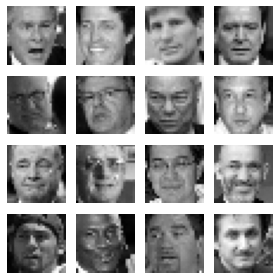

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
# mostrando as 16 primeiras imagens
for i in range(16):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

### Questão 4)

Vamos utilizar o método LBP (com parâmetros conforme visto nos exercícios) e a distância Euclidiana para comparar faces na mesma base de dados utilizada na questão anterior. Porém agora vamos calcular dois descritores LBP, cada qual com parâmetros diferentes, contatená-los e utilizar esse vetor concatenado para recuperar imagens similares.

Vetor LBP 1:
* points = 8
* radius = 1
* n_bins = 10

Vetor LBP 2:
* points = 16
* radius = 3
* n_bins = 18

Utilizando como imagem de consulta a imagem 45 da lista, retorne as 5 imagens mais similares (excluindo a de consulta). Essas características com a imagem de consulta utilizada representou bem imagens com uma característica facial específica. Qual é essa característica?

(a) Pessoas de óculos<br>
(b) Mulheres brancas<br>
(c) Mulheres com cabelo de cor escura<br>
(d) Pessoas sorrindo<br>

### Questão 5)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - um *framework* para aprender características com base nos dados e que pode ser aplicado em dados não estruturados como texto, sinais, imagens e vídeo.<br>
II - um método de descrição de dados não estruturados por meio do PCA.<br>
III - permite obter características que podem ser utilizadas em tarefas como: recuperação de informação, agrupamento e classificação<br>
IV - o tamanho do dicionário é um dos parâmetros mais relevantes e, em geral, quanto maior puder ser definido com base na capacidade computacional, melhores serão os resultados.<br>
V - pode-se utilizar qualquer extrator de características como base para uso no Bag-of-Features.<br>
VI - uma desvantagem do método é o número de escolhas possíveis a definir em cada etapa, as quais exigem uma busca pelos melhores parâmetros.<br>

São verdadeiras as afirmações:

(a) I, II, III e V<br>
(b) I, III, V e VI<br>
(c) I, III, IV, V e VI<br>
(d) I, III, IV, V<br>